# Time Series Forecasting

In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import seaborn as sns
# sns.set_style("fivethirtyeight")
plt.style.use('fivethirtyeight')

from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error


## Common function definition

In [49]:
def plot_series(time, series, format='-',start=0, end=None):
#     plt.plot(time[start:end], series[start:end],format)
    sns.lineplot(time[start:end], series[start:end])
    plt.xlabel("Time")
    plt.ylabel("Value")
    
def trend(time, slope=0):
    return time*slope

def seasonal_pattern(season_time):
    seasonal_pattern = np.where(season_time < 0.4,
                               np.cos(season_time * 2 * np.pi),
                               1 / np.exp(3 * season_time))
    return seasonal_pattern

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


## Simulate series

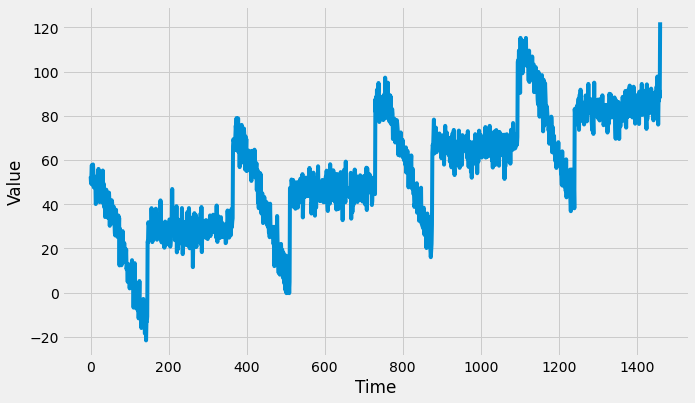

In [50]:
time = np.arange( 4*365 + 1, dtype="float64")
baseline = 10
series = trend(time, 0.1)
amplitude = 40
slope = 0.05
noise_level  = 5


series =  baseline + trend(time, slope) # straight trend
series += seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()


## Data preperation

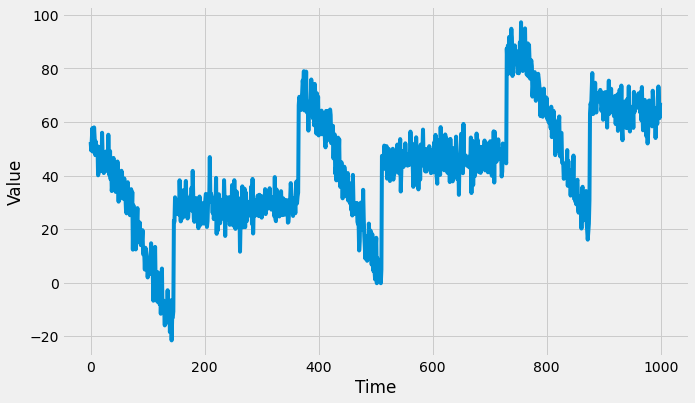

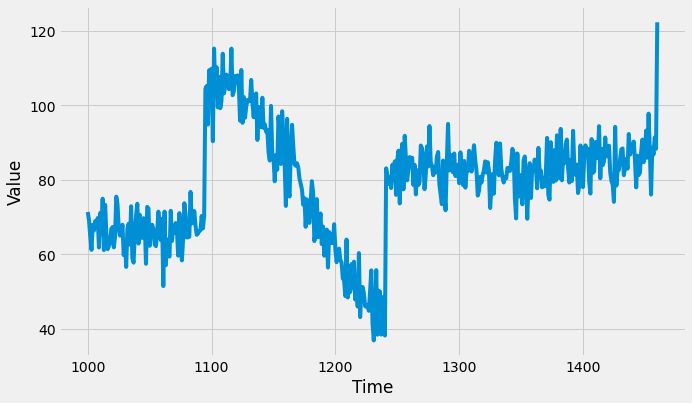

In [51]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

# Plot training data
plt.figure(figsize=(10,6))
plot_series(time_train, x_train)

# Plot validation data
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)

## Naive forecasting

In [63]:
naive_forecast = series[split_time-1:-1]

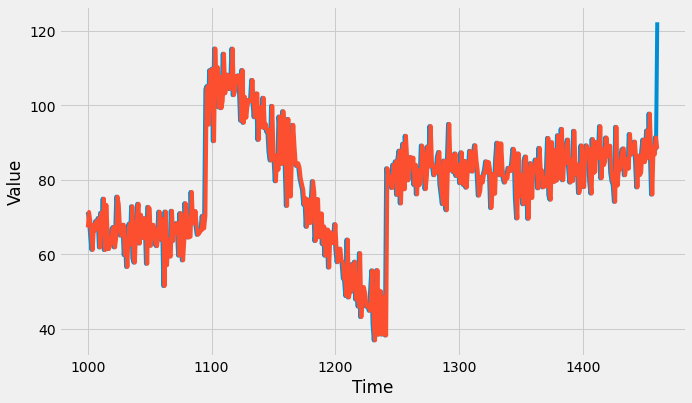

In [67]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

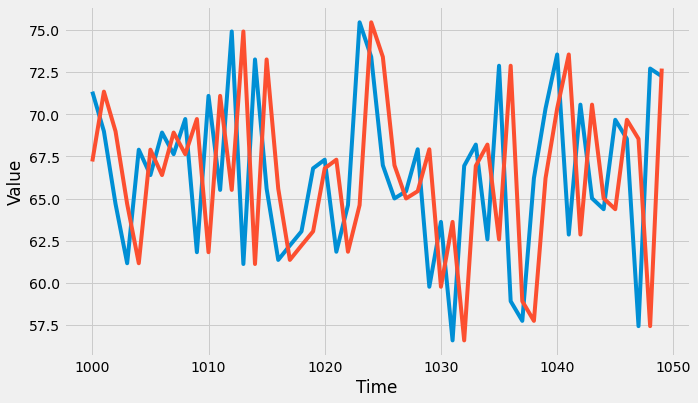

In [69]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, start = 0, end = 50)
plot_series(time_valid, naive_forecast, start = 0, end = 50)

In [87]:
print("MSE {}".format(mean_squared_error(x_valid,naive_forecast).numpy()))
print("RMSE {}".format(np.sqrt((mean_squared_error(x_valid,naive_forecast).numpy()))))
print("MAE {}".format(mean_absolute_error(x_valid,naive_forecast).numpy()))

MSE 61.82753366856369
RMSE 7.863048624329096
MAE 5.937908515321679


## Moving Average

In [137]:
def moving_average_forecast(series, window_size):
#     window_size = 5
    forecast = [] 
    for i in range(len(series) - window_size):
        forecast.append(np.mean(series[i:i+window_size]))
#         forecast.append(np.mean(series[(i-window_size):(i)]))
    return forecast

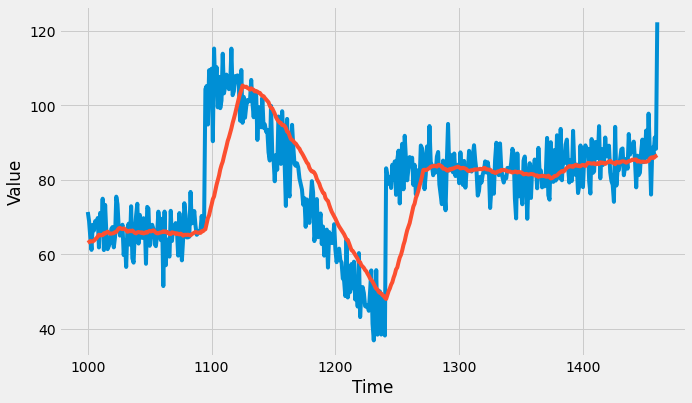

In [138]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]


plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

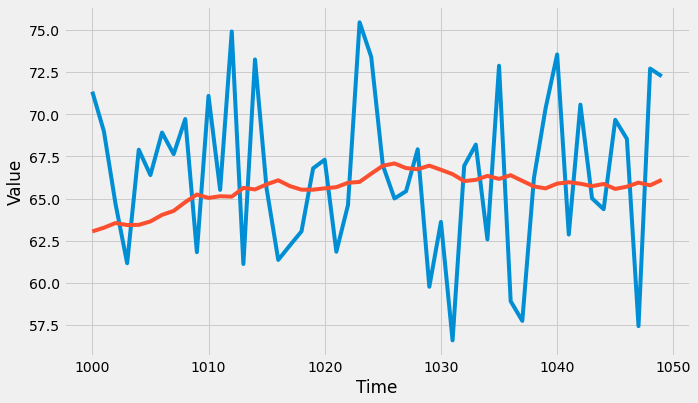

In [140]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, start = 0, end = 50)
plot_series(time_valid, moving_avg, start = 0, end = 50)

In [141]:
print("MSE {}".format(mean_squared_error(x_valid,moving_avg).numpy()))
print("RMSE {}".format(np.sqrt((mean_squared_error(x_valid,moving_avg).numpy()))))
print("MAE {}".format(mean_absolute_error(x_valid,moving_avg).numpy()))

MSE 106.67456651431168
RMSE 10.328338032535132
MAE 7.142418570620877


## Moving average with seasonality

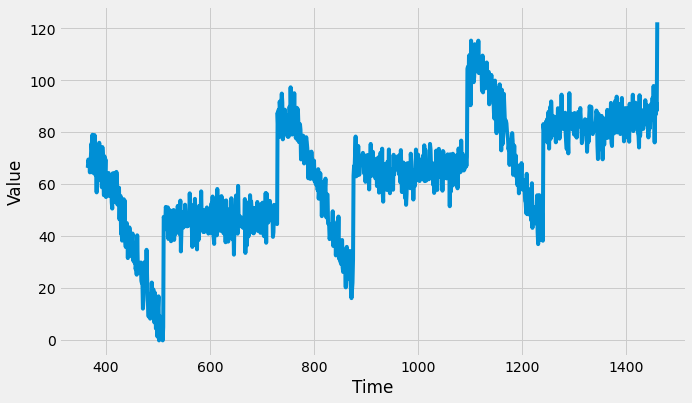

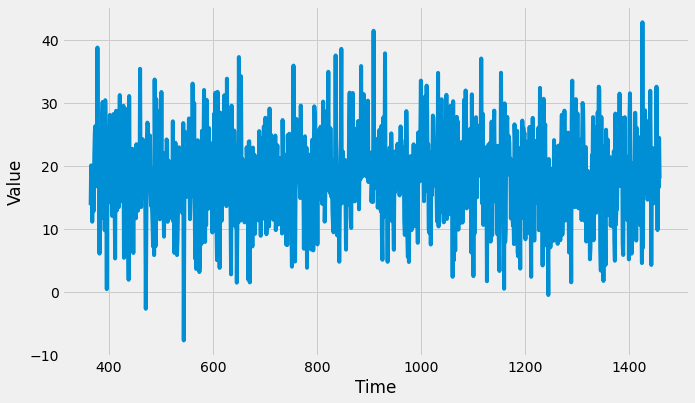

In [147]:
diff_series = (series[365:] - series[:-365])

plt.figure(figsize=(10,6))
plot_series(time[365:],series[365:])


plt.figure(figsize=(10,6))
plot_series(time[365:],diff_series)

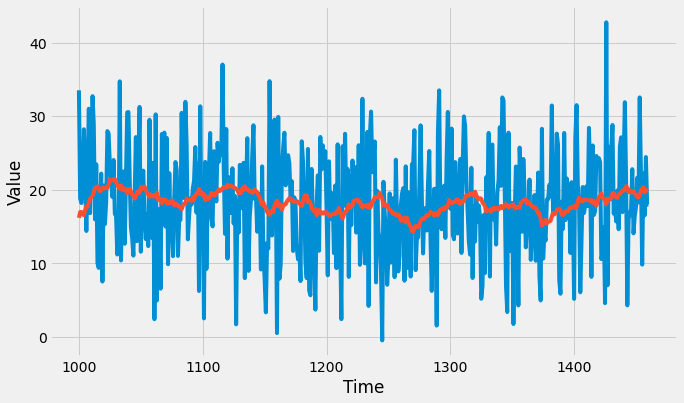

In [156]:
moving_avg = moving_average_forecast(diff_series, 30)[split_time - 365 - 30:]


plt.figure(figsize=(10,6))
plot_series(time_valid, diff_series[split_time-365:])
plot_series(time_valid, moving_avg)

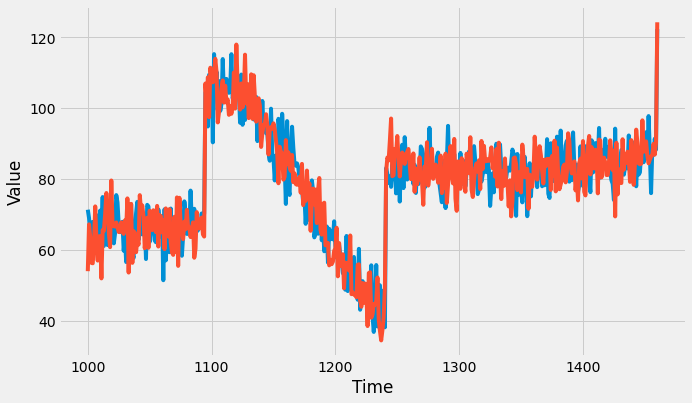

In [164]:
moving_avg_corrected = moving_avg +  series[split_time - 365:-365]


plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg_corrected)

In [166]:
print("MSE {}".format(mean_squared_error(x_valid,moving_avg_corrected).numpy()))
print("RMSE {}".format(np.sqrt((mean_squared_error(x_valid,moving_avg_corrected).numpy()))))
print("MAE {}".format(mean_absolute_error(x_valid,moving_avg_corrected).numpy()))

MSE 53.76458283759627
RMSE 7.332433623129245
MAE 5.903241593813161
